# Estadistica Aplicada
## Andrik Daniel Vazquez Regalado - 1905622
### 9va Sesión 02 de marzo 2023

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from lifelines import KaplanMeierFitter

In [18]:
dic_t ={"tiempo":[12, 19, 20, 20, 33],"evento":[1, 1, 1, 0, 0]}

In [20]:
dic_n ={'tiempo':[3, 5, 7, 9, 18], 'evento':[1, 1, 1, 0, 1]}

In [24]:
tratados = pd.DataFrame(dic_t)
no_trat = pd.DataFrame(dic_n)

In [25]:
tratados

,tiempo,evento
0,12,1
1,19,1
2,20,1
3,20,0
4,33,0


In [26]:
no_trat

,tiempo,evento
0,3,1
1,5,1
2,7,1
3,9,0
4,18,1


In [27]:
km_t = KaplanMeierFitter().fit(tratados['tiempo'], tratados['evento'])
km_nt = KaplanMeierFitter().fit(no_trat['tiempo'], no_trat['evento'])

In [28]:
km_nt.survival_function_

,KM_estimate
timeline,
0.0,1.0
3.0,0.8
5.0,0.6
7.0,0.4
9.0,0.4
18.0,0.0


In [29]:
km_t.survival_function_

,KM_estimate
timeline,
0.0,1.0
12.0,0.8
19.0,0.6
20.0,0.4
33.0,0.4


In [30]:
km_nt.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,5,5
3.0,1,1,0,0,5
5.0,1,1,0,0,4
7.0,1,1,0,0,3
9.0,1,0,1,0,2
18.0,1,1,0,0,1


In [31]:
km_t.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,5,5
12.0,1,1,0,0,5
19.0,1,1,0,0,4
20.0,2,1,1,0,3
33.0,1,0,1,0,1


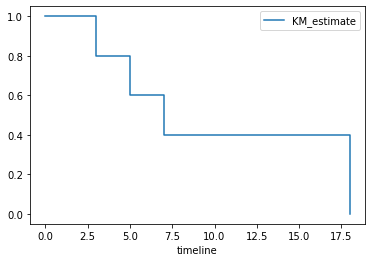

In [33]:
km_nt.plot_survival_function(ci_show = False);

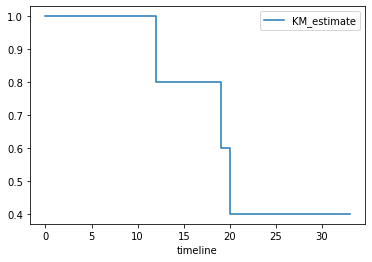

In [34]:
km_t.plot_survival_function(ci_show = False);

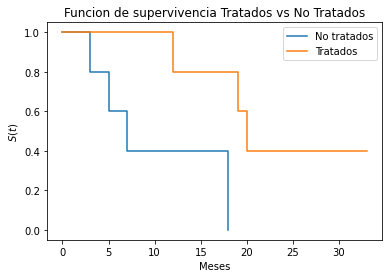

In [37]:
km_nt.plot_survival_function(label = "No tratados", ci_show = False)
km_t.plot_survival_function(label = "Tratados", ci_show = False)
plt.title("Funcion de supervivencia Tratados vs No Tratados")
plt.ylabel("$S(t)$")
plt.xlabel("Meses")
plt.show()

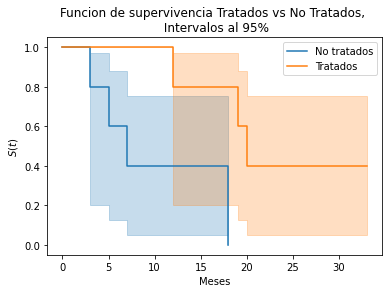

In [38]:
km_nt.plot_survival_function(label = "No tratados")
km_t.plot_survival_function(label = "Tratados")
plt.title("Funcion de supervivencia Tratados vs No Tratados, \n Intervalos al 95%")
plt.ylabel("$S(t)$")
plt.xlabel("Meses")
plt.show()

### Con los intervalos de confianza al 95% esta en duda si el tratamiento funciona o no ya que hay un punto donde interceptan ambos intervalos.

In [39]:
from lifelines.statistics import logrank_test

In [42]:
lrt = logrank_test( tratados["tiempo"], tratados["evento"],
                   no_trat["tiempo"], no_trat["evento"])

In [44]:
lrt.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           7.50 0.01      7.34>

In [43]:
lrt.summary

,test_statistic,p,-log2(p)
0,7.498516,0.006175,7.339349


### Si P.value < $\alpha$ Rechazamos H0

### Conclusión: a un 95% de confianza rechazamos H0, significa que las funciones de supervivencia de tratados y No tratados son distintas.

In [45]:
km_nt.median_survival_time_

7.0

### El 50% de los no tratados murio antes de los 7 meses 

In [46]:
km_t.median_survival_time_

20.0

### El 50% de los tratados sobrevive mas de 20 meses

In [47]:
from lifelines import ExponentialFitter

In [48]:
exp_t = ExponentialFitter().fit(tratados["tiempo"], tratados["evento"])

<function matplotlib.pyplot.show(close=None, block=None)>

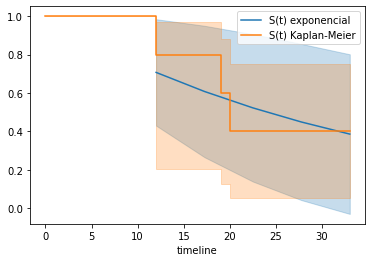

In [49]:
exp_t.plot_survival_function(label = "S(t) exponencial")
km_t.plot_survival_function(label = "S(t) Kaplan-Meier")
plt.show